# LLM APIs

We're going to use examples of free existing APIs to understand how LLM work and how we can use them.

## Huggingface Inference API

Requirements:
- a huggingface account -> https://huggingface.co/join
- a token to authenticate with the API -> https://huggingface.co/settings/tokens/new

Steps to setup:

1. When creating a new token, make sure to set the type to "fine-grained", name it, and check the "Make calls to ..." under the "Inference" permission.
<div>
<img src="https://raw.githubusercontent.com/legraphista/llm-lab/9bf3f85aabace2a96a1f5bf49ed08b35d58fc4c3/.images/create_hf_inference_token.png" width="500"/>
</div>
2. Copy the token and save it in a secure place.

___

Rate limits: https://huggingface.co/docs/api-inference/rate-limits

In [ ]:
!pip install -q huggingface_hub --upgrade

In [58]:
def get_hf_token():
    print("Please provide your Hugging Face token.")
    hf_token = input("Please paste your Hugging Face token here: ")
    try:
        from huggingface_hub import HfApi
        api = HfApi()
        print('logged in as', api.whoami(token=hf_token)['name'])
    except Exception as e:
        print("Make sure your Hugging Face key is correct.")
        print(f"Error: {e}")
    return hf_token

hf_token = get_hf_token()

Please provide your Hugging Face token.
logged in as legraphista


In [59]:
from huggingface_hub import InferenceClient

client = InferenceClient(api_key=hf_token)

### Testing the API with text generation

In [60]:
messages = [
	{ "role": "user", "content": "When is Alan Turing birthday?" }
]

output = client.chat.completions.create(
    model="Qwen/Qwen2.5-72B-Instruct", 
	messages=messages, 
	stream=True, 
)

for chunk in output:
    print(chunk.choices[0].delta.content, end='', flush=True)

Alan Turing's birthday is June 23, 1912.

In [61]:
messages = [
	{ 
        "role": "user", 
        "content": "I want to make a link shortener. Give me a list of creative, never before seen names that i can use." 
    }
]

[low_temp, high_temp] = [
    client.chat.completions.create(
        model="meta-llama/Llama-3.2-1B-Instruct", 
        messages=messages, 
        stream=False, 
        seed=42,
        temperature=0.6,
        max_tokens=512,
    ),
    client.chat.completions.create(
        model="meta-llama/Llama-3.2-1B-Instruct", 
        messages=messages, 
        stream=False, 
        seed=42,
        temperature=1,
        max_tokens=512,
    )   
]

[mk_low_temp, mk_high_temp] = [
    low_temp.choices[0].message.content,
    high_temp.choices[0].message.content,
]

!pip -q install markdown ipywidgets

from IPython.display import display
from markdown import markdown
from ipywidgets import HBox, Layout, HTML

display(HBox([
    HTML(value=markdown(mk_low_temp), layout=Layout(width='50%')),
    HTML(value=markdown(mk_high_temp), layout=Layout(width='50%'))
], layout=Layout(display='flex', flex_flow='row', justify_content='space-between', width='100%')))


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


## Gemini API

Requirements:
- a Google account

Steps to setup:

1. Navigate to https://aistudio.google.com/ and accept the terms and conditions.  
2. Click on the "Get API Key" button or navigate to https://aistudio.google.com/app/apikey
<div>
<img src="./.images/gemini_create_api_key_1.png" width="300"/>
</div>

3. Click on "Create API Key"
<div>
<img src="./.images/gemini_create_api_key_2.png" width="500"/>
</div>

4. Click on "Create API key in new project" or select an existing project if there is one already created.
<div>
<img src="./.images/gemini_create_api_key_3.png" width="500"/>
</div>

5. Copy the API key and save it in a secure place.
___

Rate limits: https://ai.google.dev/pricing

In [78]:
!pip install -q "google-generativeai>=0.7.2" --upgrade

5269.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import google.generativeai as genai

In [4]:
def setup_gemini_token():
    print("Please provide your Gemini API key.")
    gemini_token = input("Please paste your Gemini token here: ")
    genai.configure(api_key=gemini_token)
    
    try:
        list(genai.list_files())
    except Exception as e:
        print("Make sure you have the Gemini API enabled in your Google Cloud Console and the key is correct.")
        print(f"Error: {e}")

    models = [m.name for m in genai.list_models()]
    print(f"Available models:")
    for model in models:
        if 'gemini' in model.lower():
            print(f" - {model}")
    

setup_gemini_token()

Please provide your Gemini API key.
Available models:
 - models/gemini-1.0-pro-latest
 - models/gemini-1.0-pro
 - models/gemini-pro
 - models/gemini-1.0-pro-001
 - models/gemini-1.0-pro-vision-latest
 - models/gemini-pro-vision
 - models/gemini-1.5-pro-latest
 - models/gemini-1.5-pro-001
 - models/gemini-1.5-pro-002
 - models/gemini-1.5-pro
 - models/gemini-1.5-pro-exp-0801
 - models/gemini-1.5-pro-exp-0827
 - models/gemini-1.5-flash-latest
 - models/gemini-1.5-flash-001
 - models/gemini-1.5-flash-001-tuning
 - models/gemini-1.5-flash
 - models/gemini-1.5-flash-exp-0827
 - models/gemini-1.5-flash-002
 - models/gemini-1.5-flash-8b
 - models/gemini-1.5-flash-8b-001
 - models/gemini-1.5-flash-8b-latest
 - models/gemini-1.5-flash-8b-exp-0827
 - models/gemini-1.5-flash-8b-exp-0924


### Choosing a model and testing the API

In [38]:
model = genai.GenerativeModel('models/gemini-1.5-flash-002')

### Testing the API with text generation

In [40]:
response = model.generate_content(
    'When is Alan Turing birthday?',
    stream=True,
    generation_config=genai.GenerationConfig(
        max_output_tokens=128,
        temperature=0.9,
    )
)
for chunk in response:
    print(chunk.text, end='', flush=True)

Alan Turing's birthday is **June 23, 1912**.


### Testing the API with Images

In [ ]:
!pip install -q pillow

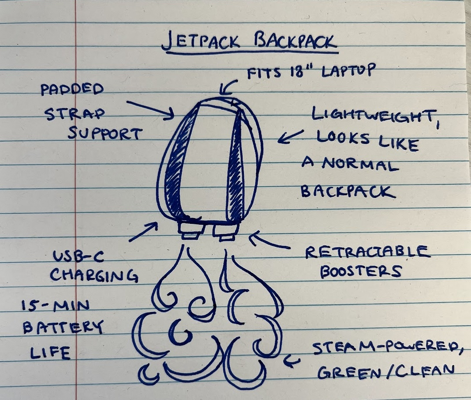

Here's a description of the image:

The image is a hand-drawn sketch on lined notebook paper, depicting a concept for a "Jetpack Backpack." 


The central element is a simple drawing of a backpack, rendered in blue ink. It's designed to look like a regular backpack, with shoulder straps and a main compartment. However, small, square nozzles are drawn at the bottom, from which stylized steam or exhaust trails emanate.


Surrounding the backpack sketch are annotations explaining its features, also written in blue ink:

* **"Fits 18” Laptop"**: Indicates the backpack's size.
* **"Padded Strap Support"**: Describes a comfort feature.
* **"Lightweight, Looks like a normal backpack"**: Highlights its inconspicuous design.
* **"USB-C Charging"**: Specifies its charging method.
* **"15-min Battery Life"**:  Provides information about the battery duration.
* **"Retractable Boosters"**: Explains the function of the nozzles.
* **"Steam-powered, Green/Clean"**:  Specifies the propulsion system and

In [54]:
import requests
import PIL.Image

# download and display sample image
img = PIL.Image.open(requests.get('https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg', stream=True).raw).copy()
display(img.resize((int(img.width / img.height * 400), 400)))

# ask the model to describe the image
response = model.generate_content(
    contents=[
        {
            "role": "user",
            "parts": [
                {
                    "text": "Read the image and describe it in detail."
                },
                img
            ]
        }
    ],
    stream=True,
    generation_config=genai.GenerationConfig(
        max_output_tokens=512,
        temperature=0.5,
    )
)
for chunk in response:
    print(chunk.text, end='', flush=True)


### Testing the API JSON mode

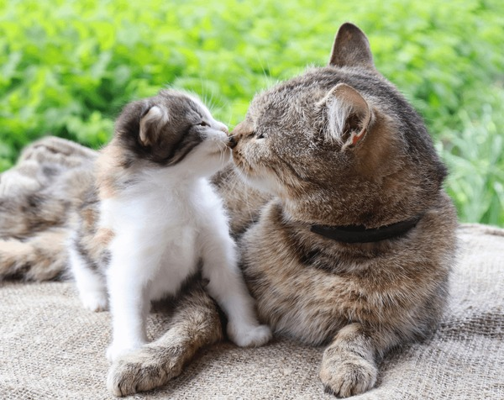

{'action_description': 'Two cats are shown in the image. One is an adult tabby '
                       'cat, and the other is a small kitten.',
 'cats': [{'color': 'tabby', 'estimated_age': 1.0, 'role': 'mother'},
          {'color': 'white with calico markings',
           'estimated_age': 0.25,
           'role': 'kitten'}],
 'count': 2}


In [57]:
import sys
import json


if sys.version_info < (3, 12):
    from typing_extensions import TypedDict
else:
    from typing import TypedDict

# download and display sample image
img = PIL.Image.open(requests.get('https://www.shutterstock.com/image-photo/cat-striped-mom-takes-care-600nw-1770843230.jpg', stream=True).raw).copy()
display(img.resize((int(img.width / img.height * 400), 400)))

# define data structure
class Cat(TypedDict):
    role: str
    estimated_age: float
    color: str

class ImageData(TypedDict):
    cats: list[Cat]
    count: int
    action_description: str

# ask the model to describe the image and return the data in JSON format following the defined schema
response = model.generate_content(
    contents=[
        {
            "role": "user",
            "parts": [
                {
                    "text": """
Look at the image and describe the cats in detail.
Return the data in JSON format.
""".strip()
                },
                img
            ]
        }
    ],
    generation_config=genai.GenerationConfig(
        response_mime_type="application/json",
        response_schema=ImageData,
        temperature=0,
    )
)

json_text = response.text
json_data = json.loads(json_text)

from pprint import pprint
pprint(json_data)